In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model  
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
#Open and read the data set for student performance
data= pd.read_csv('student-mat.csv', sep=';')
data = pd.DataFrame(data)

#The next line is to confirm that the correct data set is read.
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#Add different column dummies to transform a categorical/binary data into numerical data. 
#Following the order of the original data set.

pd.get_dummies(data.school)
pd.get_dummies(data.school, prefix='school')
school_dummies = pd.get_dummies(data.school, prefix='school')
data = pd.concat([data, school_dummies], axis=1)

pd.get_dummies(data.sex)
pd.get_dummies(data.sex, prefix='sex')
sex_dummies = pd.get_dummies(data.sex, prefix='sex')
data = pd.concat([data, sex_dummies], axis=1)

pd.get_dummies(data.address)
pd.get_dummies(data.address, prefix='address')
address_dummies = pd.get_dummies(data.address, prefix='address')
data = pd.concat([data, address_dummies], axis=1)

pd.get_dummies(data.famsize)
pd.get_dummies(data.famsize, prefix='famsize')
famsize_dummies = pd.get_dummies(data.famsize, prefix='famsize')
data = pd.concat([data, famsize_dummies], axis=1)

pd.get_dummies(data.Pstatus)
pd.get_dummies(data.Pstatus, prefix='Pstatus')
Pstatus_dummies = pd.get_dummies(data.Pstatus, prefix='Pstatus')
data = pd.concat([data, Pstatus_dummies], axis=1)

pd.get_dummies(data.Mjob)
pd.get_dummies(data.Mjob, prefix='Mjob')
Mjob_dummies = pd.get_dummies(data.Mjob, prefix='Mjob')
data = pd.concat([data, Mjob_dummies], axis=1)

pd.get_dummies(data.Fjob)
pd.get_dummies(data.Fjob, prefix='Fjob')
Fjob_dummies = pd.get_dummies(data.Fjob, prefix='Fjob')
data = pd.concat([data, Fjob_dummies], axis=1)

pd.get_dummies(data.reason)
pd.get_dummies(data.reason, prefix='reason')
reason_dummies = pd.get_dummies(data.reason, prefix='reason')
data = pd.concat([data, reason_dummies], axis=1)

pd.get_dummies(data.guardian)
pd.get_dummies(data.guardian, prefix='guardian')
guardian_dummies = pd.get_dummies(data.guardian, prefix='guardian')
data = pd.concat([data, guardian_dummies], axis=1)

pd.get_dummies(data.schoolsup)
pd.get_dummies(data.schoolsup, prefix='schoolsup')
schoolsup_dummies = pd.get_dummies(data.schoolsup, prefix='schoolsup')
data = pd.concat([data, schoolsup_dummies], axis=1)

pd.get_dummies(data.famsup)
pd.get_dummies(data.famsup, prefix='famsup')
famsup_dummies = pd.get_dummies(data.famsup, prefix='famsup')
data = pd.concat([data, famsup_dummies], axis=1)

pd.get_dummies(data.paid)
pd.get_dummies(data.paid, prefix='paid')
paid_dummies = pd.get_dummies(data.paid, prefix='paid')
data = pd.concat([data, paid_dummies], axis=1)

pd.get_dummies(data.activities)
pd.get_dummies(data.activities, prefix='activities')
activities_dummies = pd.get_dummies(data.activities, prefix='activities')
data = pd.concat([data, activities_dummies], axis=1)

pd.get_dummies(data.nursery)
pd.get_dummies(data.nursery, prefix='nursery')
nursery_dummies = pd.get_dummies(data.nursery, prefix='nursery')
data = pd.concat([data, nursery_dummies], axis=1)

pd.get_dummies(data.higher)
pd.get_dummies(data.higher, prefix='higher')
higher_dummies = pd.get_dummies(data.higher, prefix='higher')
data = pd.concat([data, activities_dummies], axis=1)

pd.get_dummies(data.internet)
pd.get_dummies(data.internet, prefix='internet')
internet_dummies = pd.get_dummies(data.internet, prefix='internet')
data = pd.concat([data, internet_dummies], axis=1)

pd.get_dummies(data.romantic)
pd.get_dummies(data.romantic, prefix='romantic')
romantic_dummies = pd.get_dummies(data.romantic, prefix='romantic')
data = pd.concat([data, romantic_dummies], axis=1)

data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,activities_no,activities_yes,nursery_no,nursery_yes,activities_no,activities_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,0,0,1,1,0,1,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,0,1,0,1,0,0,1,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,0,0,1,1,0,0,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,1,0,1,0,1,0,1,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,1,0,0,1,1,0,1,0,1,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,1,0,1,0,1,0,0,1,1,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,1,0,1,0,1,0,1,0,1,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,0,1,0,1,0,0,1,1,0


In [4]:
#Delete the columns that will no longer be used.
data.drop(['school', 'sex','address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], axis='columns', inplace=True)


In [5]:
data2 = data

In [6]:
data = data.drop(["G3"],axis=1)

In [6]:
#Drop the output
data = data.drop(["G3"],axis=1)

In [7]:
#Create training and testing variables

#Define G3 as the target variable( dependent variable)
y = data2.G3 #data2 contains y and data doesnt contain y

# Split the dataset for training and testing vars (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape) 

(316, 58) (316,)
(79, 58) (79,)


In [8]:
import tensorflow as tf
from tensorflow import keras

C:\Users\pmxjo1\.conda\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pmxjo1\.conda\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pmxjo1\.conda\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pmxjo1\.conda\envs\mle_tf\lib\site-packages\tensorflow\python\frame

In [9]:
model = keras.Sequential([
    keras.layers.Dense(58, activation=tf.nn.softmax, input_shape=[58]),
    keras.layers.Dense(50, activation=tf.nn.softmax),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.softmax),
    keras.layers.Dense(1)
])
#Learning rate
tf.keras.optimizers.Adam(lr=0.25)
model.compile(optimizer='adam', 
              loss=tf.losses.mean_squared_error,metrics=['accuracy'])#,optimizer=opt)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [10]:
model.compile(optimizer='adam', 
              loss=tf.losses.mean_squared_error,metrics=['accuracy'])
              

In [11]:
model.fit(X_train, y_train, epochs=1000, batch_size = 57)#, epochs = 100)

Epoch 1/1000
316/316 [==============================] - 1s 3ms/sample - loss: 132.3202 - acc: 0.0886
Epoch 2/1000
316/316 [==============================] - 0s 28us/sample - loss: 132.0095 - acc: 0.0886
Epoch 3/1000
316/316 [==============================] - 0s 28us/sample - loss: 131.6975 - acc: 0.0886
Epoch 4/1000
316/316 [==============================] - 0s 28us/sample - loss: 131.3706 - acc: 0.0886
Epoch 5/1000
316/316 [==============================] - 0s 28us/sample - loss: 131.0283 - acc: 0.0886
Epoch 6/1000
316/316 [==============================] - 0s 28us/sample - loss: 130.6638 - acc: 0.0886
Epoch 7/1000
316/316 [==============================] - 0s 32us/sample - loss: 130.2925 - acc: 0.0886
Epoch 8/1000
316/316 [==============================] - 0s 28us/sample - loss: 129.8945 - acc: 0.0886
Epoch 9/1000
316/316 [==============================] - 0s 28us/sample - loss: 129.4827 - acc: 0.0886
Epoch 10/1000
316/316 [==============================] - 0s 28us/sample - loss: 129

316/316 [==============================] - 0s 25us/sample - loss: 101.7290 - acc: 0.0000e+00
Epoch 79/1000
316/316 [==============================] - 0s 25us/sample - loss: 101.4516 - acc: 0.0000e+00
Epoch 80/1000
316/316 [==============================] - 0s 28us/sample - loss: 101.1845 - acc: 0.0000e+00
Epoch 81/1000
316/316 [==============================] - 0s 28us/sample - loss: 100.9158 - acc: 0.0000e+00
Epoch 82/1000
316/316 [==============================] - 0s 32us/sample - loss: 100.6511 - acc: 0.0000e+00
Epoch 83/1000
316/316 [==============================] - 0s 25us/sample - loss: 100.3894 - acc: 0.0000e+00
Epoch 84/1000
316/316 [==============================] - 0s 35us/sample - loss: 100.1314 - acc: 0.0000e+00
Epoch 85/1000
316/316 [==============================] - 0s 29us/sample - loss: 99.8752 - acc: 0.0000e+00
Epoch 86/1000
316/316 [==============================] - 0s 28us/sample - loss: 99.6171 - acc: 0.0000e+00
Epoch 87/1000
316/316 [==============================

316/316 [==============================] - 0s 28us/sample - loss: 85.0057 - acc: 0.0000e+00
Epoch 155/1000
316/316 [==============================] - 0s 44us/sample - loss: 84.8156 - acc: 0.0000e+00
Epoch 156/1000
316/316 [==============================] - 0s 32us/sample - loss: 84.6266 - acc: 0.0000e+00
Epoch 157/1000
316/316 [==============================] - 0s 28us/sample - loss: 84.4397 - acc: 0.0000e+00
Epoch 158/1000
316/316 [==============================] - 0s 38us/sample - loss: 84.2499 - acc: 0.0000e+00
Epoch 159/1000
316/316 [==============================] - 0s 28us/sample - loss: 84.0657 - acc: 0.0000e+00
Epoch 160/1000
316/316 [==============================] - 0s 51us/sample - loss: 83.8795 - acc: 0.0000e+00
Epoch 161/1000
316/316 [==============================] - 0s 28us/sample - loss: 83.6950 - acc: 0.0000e+00
Epoch 162/1000
316/316 [==============================] - 0s 41us/sample - loss: 83.5090 - acc: 0.0000e+00
Epoch 163/1000
316/316 [============================

316/316 [==============================] - 0s 28us/sample - loss: 71.9692 - acc: 0.0000e+00
Epoch 231/1000
316/316 [==============================] - 0s 38us/sample - loss: 71.8168 - acc: 0.0000e+00
Epoch 232/1000
316/316 [==============================] - 0s 28us/sample - loss: 71.6617 - acc: 0.0000e+00
Epoch 233/1000
316/316 [==============================] - 0s 25us/sample - loss: 71.5078 - acc: 0.0000e+00
Epoch 234/1000
316/316 [==============================] - 0s 47us/sample - loss: 71.3529 - acc: 0.0000e+00
Epoch 235/1000
316/316 [==============================] - 0s 28us/sample - loss: 71.1998 - acc: 0.0000e+00
Epoch 236/1000
316/316 [==============================] - 0s 41us/sample - loss: 71.0470 - acc: 0.0000e+00
Epoch 237/1000
316/316 [==============================] - 0s 32us/sample - loss: 70.8963 - acc: 0.0000e+00
Epoch 238/1000
316/316 [==============================] - 0s 32us/sample - loss: 70.7451 - acc: 0.0000e+00
Epoch 239/1000
316/316 [============================

316/316 [==============================] - 0s 28us/sample - loss: 61.1410 - acc: 0.0000e+00
Epoch 307/1000
316/316 [==============================] - 0s 28us/sample - loss: 61.0092 - acc: 0.0000e+00
Epoch 308/1000
316/316 [==============================] - 0s 25us/sample - loss: 60.8818 - acc: 0.0000e+00
Epoch 309/1000
316/316 [==============================] - 0s 25us/sample - loss: 60.7497 - acc: 0.0000e+00
Epoch 310/1000
316/316 [==============================] - 0s 25us/sample - loss: 60.6210 - acc: 0.0000e+00
Epoch 311/1000
316/316 [==============================] - 0s 25us/sample - loss: 60.4913 - acc: 0.0000e+00
Epoch 312/1000
316/316 [==============================] - 0s 28us/sample - loss: 60.3640 - acc: 0.0000e+00
Epoch 313/1000
316/316 [==============================] - 0s 25us/sample - loss: 60.2326 - acc: 0.0000e+00
Epoch 314/1000
316/316 [==============================] - 0s 25us/sample - loss: 60.1064 - acc: 0.0000e+00
Epoch 315/1000
316/316 [============================

316/316 [==============================] - 0s 38us/sample - loss: 52.0448 - acc: 0.0000e+00
Epoch 383/1000
316/316 [==============================] - 0s 35us/sample - loss: 51.9330 - acc: 0.0000e+00
Epoch 384/1000
316/316 [==============================] - 0s 54us/sample - loss: 51.8238 - acc: 0.0000e+00
Epoch 385/1000
316/316 [==============================] - 0s 32us/sample - loss: 51.7134 - acc: 0.0000e+00
Epoch 386/1000
316/316 [==============================] - 0s 44us/sample - loss: 51.6060 - acc: 0.0000e+00
Epoch 387/1000
316/316 [==============================] - 0s 32us/sample - loss: 51.5001 - acc: 0.0000e+00
Epoch 388/1000
316/316 [==============================] - 0s 38us/sample - loss: 51.3906 - acc: 0.0000e+00
Epoch 389/1000
316/316 [==============================] - 0s 32us/sample - loss: 51.2856 - acc: 0.0000e+00
Epoch 390/1000
316/316 [==============================] - 0s 28us/sample - loss: 51.1777 - acc: 0.0000e+00
Epoch 391/1000
316/316 [============================

316/316 [==============================] - 0s 47us/sample - loss: 44.4624 - acc: 0.0000e+00
Epoch 459/1000
316/316 [==============================] - 0s 32us/sample - loss: 44.3724 - acc: 0.0000e+00
Epoch 460/1000
316/316 [==============================] - 0s 32us/sample - loss: 44.2845 - acc: 0.0000e+00
Epoch 461/1000
316/316 [==============================] - 0s 51us/sample - loss: 44.1938 - acc: 0.0000e+00
Epoch 462/1000
316/316 [==============================] - 0s 38us/sample - loss: 44.1032 - acc: 0.0000e+00
Epoch 463/1000
316/316 [==============================] - 0s 41us/sample - loss: 44.0149 - acc: 0.0000e+00
Epoch 464/1000
316/316 [==============================] - 0s 38us/sample - loss: 43.9247 - acc: 0.0000e+00
Epoch 465/1000
316/316 [==============================] - 0s 41us/sample - loss: 43.8367 - acc: 0.0000e+00
Epoch 466/1000
316/316 [==============================] - 0s 25us/sample - loss: 43.7439 - acc: 0.0000e+00
Epoch 467/1000
316/316 [============================

316/316 [==============================] - 0s 28us/sample - loss: 38.2422 - acc: 0.0000e+00
Epoch 535/1000
316/316 [==============================] - 0s 28us/sample - loss: 38.1707 - acc: 0.0000e+00
Epoch 536/1000
316/316 [==============================] - 0s 25us/sample - loss: 38.0959 - acc: 0.0000e+00
Epoch 537/1000
316/316 [==============================] - 0s 28us/sample - loss: 38.0232 - acc: 0.0000e+00
Epoch 538/1000
316/316 [==============================] - 0s 32us/sample - loss: 37.9490 - acc: 0.0000e+00
Epoch 539/1000
316/316 [==============================] - 0s 25us/sample - loss: 37.8765 - acc: 0.0000e+00
Epoch 540/1000
316/316 [==============================] - 0s 35us/sample - loss: 37.8046 - acc: 0.0000e+00
Epoch 541/1000
316/316 [==============================] - 0s 47us/sample - loss: 37.7325 - acc: 0.0000e+00
Epoch 542/1000
316/316 [==============================] - 0s 28us/sample - loss: 37.6609 - acc: 0.0000e+00
Epoch 543/1000
316/316 [============================

316/316 [==============================] - 0s 35us/sample - loss: 33.2332 - acc: 0.0000e+00
Epoch 611/1000
316/316 [==============================] - 0s 32us/sample - loss: 33.1757 - acc: 0.0000e+00
Epoch 612/1000
316/316 [==============================] - 0s 28us/sample - loss: 33.1151 - acc: 0.0000e+00
Epoch 613/1000
316/316 [==============================] - 0s 28us/sample - loss: 33.0578 - acc: 0.0000e+00
Epoch 614/1000
316/316 [==============================] - 0s 25us/sample - loss: 33.0008 - acc: 0.0000e+00
Epoch 615/1000
316/316 [==============================] - 0s 25us/sample - loss: 32.9441 - acc: 0.0000e+00
Epoch 616/1000
316/316 [==============================] - 0s 28us/sample - loss: 32.8879 - acc: 0.0000e+00
Epoch 617/1000
316/316 [==============================] - 0s 25us/sample - loss: 32.8301 - acc: 0.0000e+00
Epoch 618/1000
316/316 [==============================] - 0s 25us/sample - loss: 32.7748 - acc: 0.0000e+00
Epoch 619/1000
316/316 [============================

316/316 [==============================] - 0s 25us/sample - loss: 29.2981 - acc: 0.0000e+00
Epoch 687/1000
316/316 [==============================] - 0s 25us/sample - loss: 29.2528 - acc: 0.0000e+00
Epoch 688/1000
316/316 [==============================] - 0s 28us/sample - loss: 29.2090 - acc: 0.0000e+00
Epoch 689/1000
316/316 [==============================] - 0s 28us/sample - loss: 29.1630 - acc: 0.0000e+00
Epoch 690/1000
316/316 [==============================] - 0s 28us/sample - loss: 29.1183 - acc: 0.0000e+00
Epoch 691/1000
316/316 [==============================] - 0s 28us/sample - loss: 29.0737 - acc: 0.0000e+00
Epoch 692/1000
316/316 [==============================] - 0s 32us/sample - loss: 29.0302 - acc: 0.0000e+00
Epoch 693/1000
316/316 [==============================] - 0s 25us/sample - loss: 28.9854 - acc: 0.0000e+00
Epoch 694/1000
316/316 [==============================] - 0s 28us/sample - loss: 28.9423 - acc: 0.0000e+00
Epoch 695/1000
316/316 [============================

316/316 [==============================] - 0s 28us/sample - loss: 26.3326 - acc: 0.0000e+00
Epoch 763/1000
316/316 [==============================] - 0s 28us/sample - loss: 26.2970 - acc: 0.0000e+00
Epoch 764/1000
316/316 [==============================] - 0s 28us/sample - loss: 26.2659 - acc: 0.0000e+00
Epoch 765/1000
316/316 [==============================] - 0s 28us/sample - loss: 26.2308 - acc: 0.0000e+00
Epoch 766/1000
316/316 [==============================] - 0s 25us/sample - loss: 26.1985 - acc: 0.0000e+00
Epoch 767/1000
316/316 [==============================] - 0s 25us/sample - loss: 26.1655 - acc: 0.0000e+00
Epoch 768/1000
316/316 [==============================] - 0s 25us/sample - loss: 26.1329 - acc: 0.0000e+00
Epoch 769/1000
316/316 [==============================] - 0s 25us/sample - loss: 26.1007 - acc: 0.0000e+00
Epoch 770/1000
316/316 [==============================] - 0s 28us/sample - loss: 26.0685 - acc: 0.0000e+00
Epoch 771/1000
316/316 [============================

316/316 [==============================] - 0s 25us/sample - loss: 24.1822 - acc: 0.0000e+00
Epoch 839/1000
316/316 [==============================] - 0s 28us/sample - loss: 24.1588 - acc: 0.0000e+00
Epoch 840/1000
316/316 [==============================] - 0s 28us/sample - loss: 24.1376 - acc: 0.0000e+00
Epoch 841/1000
316/316 [==============================] - 0s 25us/sample - loss: 24.1134 - acc: 0.0000e+00
Epoch 842/1000
316/316 [==============================] - 0s 28us/sample - loss: 24.0913 - acc: 0.0000e+00
Epoch 843/1000
316/316 [==============================] - 0s 32us/sample - loss: 24.0681 - acc: 0.0000e+00
Epoch 844/1000
316/316 [==============================] - 0s 25us/sample - loss: 24.0467 - acc: 0.0000e+00
Epoch 845/1000
316/316 [==============================] - 0s 25us/sample - loss: 24.0234 - acc: 0.0000e+00
Epoch 846/1000
316/316 [==============================] - 0s 25us/sample - loss: 24.0014 - acc: 0.0000e+00
Epoch 847/1000
316/316 [============================

316/316 [==============================] - 0s 25us/sample - loss: 22.7205 - acc: 0.0000e+00
Epoch 915/1000
316/316 [==============================] - 0s 28us/sample - loss: 22.7060 - acc: 0.0000e+00
Epoch 916/1000
316/316 [==============================] - 0s 28us/sample - loss: 22.6902 - acc: 0.0000e+00
Epoch 917/1000
316/316 [==============================] - 0s 25us/sample - loss: 22.6756 - acc: 0.0000e+00
Epoch 918/1000
316/316 [==============================] - 0s 25us/sample - loss: 22.6608 - acc: 0.0000e+00
Epoch 919/1000
316/316 [==============================] - 0s 29us/sample - loss: 22.6456 - acc: 0.0000e+00
Epoch 920/1000
316/316 [==============================] - 0s 28us/sample - loss: 22.6310 - acc: 0.0000e+00
Epoch 921/1000
316/316 [==============================] - 0s 25us/sample - loss: 22.6175 - acc: 0.0000e+00
Epoch 922/1000
316/316 [==============================] - 0s 25us/sample - loss: 22.6016 - acc: 0.0000e+00
Epoch 923/1000
316/316 [============================

316/316 [==============================] - 0s 28us/sample - loss: 21.8087 - acc: 0.0000e+00
Epoch 991/1000
316/316 [==============================] - 0s 28us/sample - loss: 21.8008 - acc: 0.0000e+00
Epoch 992/1000
316/316 [==============================] - 0s 32us/sample - loss: 21.7912 - acc: 0.0000e+00
Epoch 993/1000
316/316 [==============================] - 0s 32us/sample - loss: 21.7823 - acc: 0.0000e+00
Epoch 994/1000
316/316 [==============================] - 0s 28us/sample - loss: 21.7733 - acc: 0.0000e+00
Epoch 995/1000
316/316 [==============================] - 0s 28us/sample - loss: 21.7653 - acc: 0.0000e+00
Epoch 996/1000
316/316 [==============================] - 0s 32us/sample - loss: 21.7564 - acc: 0.0000e+00
Epoch 997/1000
316/316 [==============================] - 0s 28us/sample - loss: 21.7463 - acc: 0.0000e+00
Epoch 998/1000
316/316 [==============================] - 0s 25us/sample - loss: 21.7393 - acc: 0.0000e+00
Epoch 999/1000
316/316 [============================

In [12]:
model.predict(X_test)

array([[9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.669645],
       [9.66

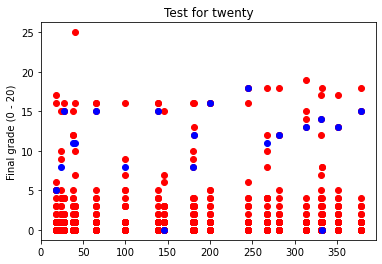

In [17]:
plt.plot(X_test[0:20], 'ro', y_test[0:20], 'bo')
plt.title('Test for twenty')
plt.ylabel('Final grade (0 - 20)')
plt.show()

In [18]:
print(y-y_test)

0      NaN
1      NaN
2      0.0
3      NaN
4      0.0
      ... 
390    NaN
391    NaN
392    NaN
393    NaN
394    0.0
Name: G3, Length: 395, dtype: float64


In [20]:
# Test model
#model.predict(X_test)
 #pred = (neural_network) # Apply softmax to logits
accuracy = tf.keras.losses.MSE(X_test,y)
print("Accuracy:", accuracy.eval({X: X_train, y:y_train}))
 #tf.keras.evaluate(pred,batch_x)
print("Prediction:", pred.eval({X: X_train}))
output = neural_network.eval({X: X_train})
plt.plot(y_train[0:10], 'ro', output[0:10], 'bo')
plt.ylabel('some numbers')
plt.show()

 #estimated_class=tf.argmax(pred, 1)#+1e-50-1e-50
 #correct_prediction1 = tf.equal(tf.argmax(pred, 1),label)
 #accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
 #print(accuracy1.eval({X: batch_x}))
    
#import matplotlib.pyplot as plt


ValueError: cannot reindex from a duplicate axis

In [29]:
X_test-y_test

ValueError: cannot reindex from a duplicate axis